In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# import file
df = pd.read_csv(r'https://raw.githubusercontent.com/koen-d-r/datacamp_telco_churn_analysis/master/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# check shape
df.shape

(7043, 21)

In [4]:
df['Churn'].value_counts(normalize = True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [5]:
# check results
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# check for empty fields
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# further data exploration
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
# set index to customerID column
df.set_index(['customerID'], drop = True, inplace = True)

In [9]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
len(df)

7043

In [11]:
# select columns that are suitable for one-hot encoding
object_list = df.nunique()[df.nunique() < 10].index.tolist()
object_list

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [12]:
# select columns that are not suitable for one-hot encoding
numerical_list = df.columns[~df.columns.isin(object_list)].tolist()

In [13]:
# create StandardScaler instance
ss = StandardScaler()

In [14]:
# create dummies
df_dummies = pd.get_dummies(df[object_list], drop_first = True)
df_dummies.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
5575-GNVDE,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3668-QPYBK,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
7795-CFOCW,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9237-HQITU,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [15]:
# rewrite empty TotalCharges to zero
df[df['TotalCharges'].str.startswith(' ')] = 0

In [16]:
# convert all values in numerical columns to float values
df[numerical_list] = df[numerical_list].astype(float)

In [17]:
# standardize numerical columns
df_standardized = pd.DataFrame(ss.fit_transform(df[numerical_list]), columns = numerical_list, index = df.index)
len(df_standardized)

7043

In [18]:
# merge numerical and dummy dataframes together
df_full = pd.merge(df_dummies, df_standardized, how = 'inner', left_index = True, right_index = True)

In [19]:
# check result
df_full.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,-1.277445,-1.155058,-0.992611
5575-GNVDE,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0.066327,-0.256787,-0.172165
3668-QPYBK,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,1,-1.236724,-0.359541,-0.958066
7795-CFOCW,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0.514251,-0.742384,-0.193672
9237-HQITU,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,1,-1.236724,0.198979,-0.938874


In [20]:
# split dataset in train and test groups
X = df_full.drop('Churn_Yes', axis = 1)
y = df_full['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(df_full.shape)

(4930, 30)
(4930,)
(2113, 30)
(2113,)
(7043, 31)


In [22]:
# use elbow method to calculate best number of estimators
result_list = []

for each in [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 400, 800]:
    rfc = RandomForestClassifier(n_estimators = each)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    precision = sum(rfc_pred == y_test) / len(y_test)
    mse = np.mean(sum(rfc_pred != y_test))
    rmse = np.sqrt(mse)
    result_list.append([each, precision, mse, rmse])
    
print(result_list)

[[1, 0.7113109323237103, 610.0, 24.698178070456937], [10, 0.779460482725982, 466.0, 21.587033144922902], [20, 0.7813535257927118, 462.0, 21.494185260204677], [30, 0.7879791765262659, 448.0, 21.166010488516726], [40, 0.7813535257927118, 462.0, 21.494185260204677], [50, 0.7856128726928537, 453.0, 21.283796653792763], [60, 0.7865593942262187, 451.0, 21.236760581595302], [70, 0.7841930903928065, 456.0, 21.354156504062622], [80, 0.7898722195929957, 444.0, 21.071307505705477], [90, 0.7927117841930904, 438.0, 20.92844953645635], [100, 0.7879791765262659, 448.0, 21.166010488516726], [200, 0.7879791765262659, 448.0, 21.166010488516726], [400, 0.7936583057264552, 436.0, 20.8806130178211], [800, 0.7879791765262659, 448.0, 21.166010488516726]]


In [23]:
pd.DataFrame(result_list, columns = ['each', 'precision', 'mse', 'rmse']).sort_values('rmse', ascending = True)

,each,precision,mse,rmse
12,400,0.793658,436.0,20.880613
9,90,0.792712,438.0,20.928450
8,80,0.789872,444.0,21.071308
3,30,0.787979,448.0,21.166010
10,100,0.787979,448.0,21.166010
11,200,0.787979,448.0,21.166010
13,800,0.787979,448.0,21.166010
6,60,0.786559,451.0,21.236761
5,50,0.785613,453.0,21.283797
7,70,0.784193,456.0,21.354157


In [24]:
# make data available for plotting
x = [x[0] for x in result_list]
y = [x[1] for x in result_list]
z = [x[3] for x in result_list]

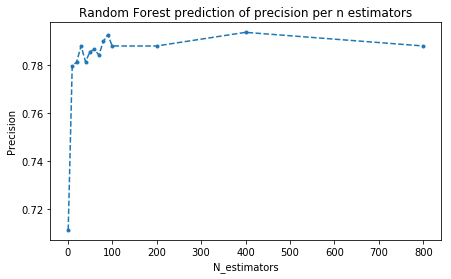

In [25]:
# plot precision per number of estimators (trees)
plt.figure(figsize = (7,4))
plt.plot(x, y, linestyle = '--', marker = '.')
plt.title('Random Forest prediction of precision per n estimators')
plt.xlabel('N_estimators')
plt.ylabel('Precision')
plt.show()

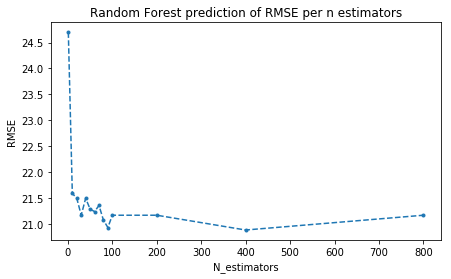

In [26]:
# plot RMSE per number of estimators (trees)
plt.figure(figsize = (7,4))
plt.plot(x, z, linestyle = '--', marker = '.')
plt.title('Random Forest prediction of RMSE per n estimators')
plt.xlabel('N_estimators')
plt.ylabel('RMSE')
plt.show()

In [27]:
# the best performing number of estimators (trees) in the RandomForestClassifier model is 90

In [28]:
# create Random Forest Classifier instance with 90 trees
rfc = RandomForestClassifier(n_estimators = 90)

# fit
rfc.fit(X_train, y_train)

# ...and predict!
rfc_pred = rfc.predict(X_test)

# calculate Mean Squared Error and Root Mean Squared Error
rfc_mse = np.mean(rfc_pred != y_test)
rfc_rmse = np.sqrt(rfc_mse)
print(f'MSE: {rfc_mse} with 90 estimators')
print(f'RMSE: {rfc_rmse} with 90 estimators')

MSE: 0.20823473734027448 with 90 estimators
RMSE: 0.45632744530684816 with 90 estimators


In [29]:
knn = KNeighborsClassifier()
lr = LogisticRegression()

In [30]:
# use elbow method to find best number of neighbors
knn_result_list = []

for each in range(1,100,5):
    knn = KNeighborsClassifier(n_neighbors = each)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    precision = sum(knn_pred == y_test) / len(y_test)
    mse = np.mean(knn_pred != y_test)
    rmse = np.sqrt(mse)
    knn_result_list.append([each, precision, mse, rmse])

In [31]:
# make data available for plotting
a = [x[0] for x in knn_result_list]
b = [x[1] for x in knn_result_list]
c = [x[3] for x in knn_result_list]

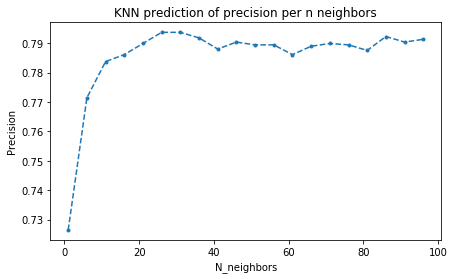

In [32]:
# plot precision
plt.figure(figsize = (7,4))
plt.plot(a, b, linestyle = '--', marker = '.')
plt.title('KNN prediction of precision per n neighbors')
plt.xlabel('N_neighbors')
plt.ylabel('Precision')
plt.show()

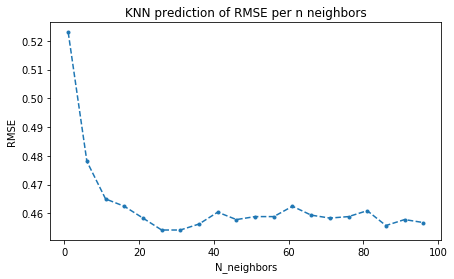

In [33]:
# plot rmse
# plot precision
plt.figure(figsize = (7,4))
plt.plot(a, c, linestyle = '--', marker = '.')
plt.title('KNN prediction of RMSE per n neighbors')
plt.xlabel('N_neighbors')
plt.ylabel('RMSE')
plt.show()

In [34]:
# plot knn_result_list in dataframe
pd.DataFrame(knn_result_list, columns = ['each', 'precision', 'mse', 'rmse']).sort_values('rmse', ascending = True)

,each,precision,mse,rmse
6,31,0.793658,0.206342,0.454248
5,26,0.793658,0.206342,0.454248
17,86,0.792239,0.207761,0.455809
7,36,0.791765,0.208235,0.456327
19,96,0.791292,0.208708,0.456846
18,91,0.790345,0.209655,0.457880
9,46,0.790345,0.209655,0.457880
14,71,0.789872,0.210128,0.458397
4,21,0.789872,0.210128,0.458397
10,51,0.789399,0.210601,0.458913


In [35]:
# create KNeighborsClassifier instance with 21 neighbors
knn = KNeighborsClassifier(n_neighbors = 21)

# fit
knn.fit(X_train, y_train)

# ...and predict!
knn_pred = knn.predict(X_test)

# calculate Mean Squared Error and Root Mean Squared Error
knn_mse = np.mean(knn_pred != y_test)
knn_rmse = np.sqrt(mse)
print(f'MSE: {knn_mse} with 21 neighbors')
print(f'RMSE: {knn_rmse} with 21 neighbors')

MSE: 0.21012778040700425 with 21 neighbors
RMSE: 0.45684570492339854 with 21 neighbors


In [36]:
# fit and predict with Logistic Regression model
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mse = np.mean(lr_pred != y_test)
lr_rmse = np.sqrt(mse)

/Users/melissabracamonte/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
the_results_are_in = {'Random Forest prediction': [rfc_mse, rfc_rmse], 
                     'KNeighbors Classifier prediction': [knn_mse, knn_rmse],
                     'Logistic Regression prediction': [lr_mse, lr_rmse]}

In [38]:
pd.DataFrame.from_dict(the_results_are_in, orient = 'index', columns = ['MSE','RMSE']).sort_values(['RMSE', 'MSE'])

,MSE,RMSE
Random Forest prediction,0.208235,0.456327
Logistic Regression prediction,0.207288,0.456846
KNeighbors Classifier prediction,0.210128,0.456846


In [39]:
# print classification report for lr_predictions
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1573
           1       0.61      0.53      0.56       540

   micro avg       0.79      0.79      0.79      2113
   macro avg       0.73      0.71      0.71      2113
weighted avg       0.78      0.79      0.79      2113



In [40]:
# print classification report for knn_predictions
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1573
           1       0.60      0.55      0.57       540

   micro avg       0.79      0.79      0.79      2113
   macro avg       0.72      0.71      0.72      2113
weighted avg       0.79      0.79      0.79      2113



In [41]:
# print classification report for rfc_predictions
print(classification_report(y_test, rfc_pred)) 

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1573
           1       0.62      0.49      0.54       540

   micro avg       0.79      0.79      0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113



In [42]:
# print confusion matrix for lr_predictions
print(confusion_matrix(y_test, lr_pred))

[[1391  182]
 [ 256  284]]


In [43]:
# print confusion matrix for rfc_predictions
print(confusion_matrix(y_test, rfc_pred))

[[1410  163]
 [ 277  263]]


In [44]:
# print confusion matrix for knn_predictions
print(confusion_matrix(y_test, knn_pred))

[[1371  202]
 [ 242  298]]


In [45]:
# For a sanity check, let's plot the coeficients for each characteristic and their impact on churn
df_coef = pd.DataFrame(lr.coef_.transpose(), index = X_train.columns, columns = ['coefficients'])
df_coef['exp_coeficient'] = np.exp(df_coef['coefficients'])
df_coef.sort_values(by = 'exp_coeficient')

,coefficients,exp_coeficient
Contract_Two year,-1.513495,0.220139
tenure,-1.273875,0.279746
PhoneService_Yes,-0.834971,0.433887
Contract_One year,-0.636913,0.528923
OnlineSecurity_Yes,-0.471438,0.624104
TechSupport_Yes,-0.409740,0.663823
OnlineBackup_Yes,-0.213706,0.807586
PaymentMethod_Credit card (automatic),-0.122143,0.885022
DeviceProtection_Yes,-0.102389,0.902678
Dependents_Yes,-0.058314,0.943354


Our models are particularly poor in predicting churned customers. Our precision on churned customers is between 0.61 (KNN) and 0.67 (LR). Also recall is low. This is explainable by our unevenly divided groups (only 26.5% of customers in the dataset churned). In the end, the Logistic Regression model is selected for predicting customers with will churn.